# NBFI Vehicle Loan Repayment

- **Kaggle Dataset:** https://www.kaggle.com/datasets/meastanmay/nbfi-vehicle-loan-repayment-dataset


- **Background:** A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a type of financial institution that is not authorized to operate as a bank or is not under the supervision of a banking regulatory agency at the national or international level. NBFCs provide financial services similar to those of banks, such as investment, risk pooling, contractual savings, and market brokering.


- **Problem Statement:** An NBFC is currently facing profitability issues due to an increase in defaults in the vehicle loan category. The company aims to assess the loan repayment ability of clients and determine the relative importance of each factor contributing to a borrower's ability to repay the loan.


- **Objective:** The objective is to predict whether a client is likely to default on their vehicle loan payment or not.


- **Data Dictionary:** - https://www.kaggle.com/datasets/meastanmay/nbfi-vehicle-loan-repayment-dataset?select=Data_Dictionary.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Updating width of Jupyter notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_colwidth', 2000)
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 4000

In [2]:
data_dict = pd.read_csv('Data_Dictionary.csv')
data_dict

,Variable,Description
0,ID,Client Loan application ID
1,Client_Income,Client Income in $
2,Car_Owned,Any Car owned by client before applying for the loan for another car (0 means No and 1 means otherwise)
3,Bike_Owned,Any bike owned by client (0 means No and 1 means otherwise)
4,Active_Loan,Any other active loan at the time of aplication of loan (0 means No and 1 means otherwise)
5,House_Own,Any house owned by client (0 means No and 1 means otherwise)
6,Child_Count,Number of children the client has
7,Credit_Amount,Credit amount of the loan in $
8,Loan_Annuity,Loan annuity in $
9,Accompany_Client,Who accompanied the client when client applied for the loan


In [3]:
loan_data = pd.read_csv('Train_Dataset.csv')
loan_data.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121855 entries, 0 to 121854
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121855 non-null  int64  
 1   Client_Income               118248 non-null  object 
 2   Car_Owned                   118274 non-null  float64
 3   Bike_Owned                  118231 non-null  float64
 4   Active_Loan                 118220 non-null  float64
 5   House_Own                   118194 non-null  float64
 6   Child_Count                 118217 non-null  float64
 7   Credit_Amount               118223 non-null  object 
 8   Loan_Annuity                117043 non-null  object 
 9   Accompany_Client            120109 non-null  object 
 10  Client_Income_Type          118154 non-null  object 
 11  Client_Education            118210 non-null  object 
 12  Client_Marital_Status       118382 non-null  object 
 13  Client_Gender 

In [5]:
# Check for missing values
loan_data.isnull().sum()

# There are few columns where the feature have more than 25% of missing values.

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80094
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [6]:
# Check the distribution of the target variable
loan_data['Default'].value_counts()

0    112011
1      9844
Name: Default, dtype: int64

In [7]:
loan_data[loan_data.duplicated()]

#Outcome: No duplicate data found.

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default


In [8]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,121855.0,1.216093e+07,35176.723805,1.210000e+07,1.213047e+07,1.216093e+07,1.219139e+07,1.222186e+07
Car_Owned,118274.0,3.428564e-01,0.474666,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Bike_Owned,118231.0,3.322563e-01,0.471024,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Active_Loan,118220.0,4.991710e-01,0.500001,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
House_Own,118194.0,6.920571e-01,0.461645,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Child_Count,118217.0,4.177826e-01,0.728804,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.900000e+01
Own_House_Age,41761.0,1.215732e+01,12.056079,0.000000e+00,5.000000e+00,9.000000e+00,1.500000e+01,6.900000e+01
Mobile_Tag,121855.0,9.999918e-01,0.002865,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Homephone_Tag,121855.0,2.005006e-01,0.400377,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Workphone_Working,121855.0,2.812031e-01,0.449588,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [9]:
## Listing Numeric features
loan_data.select_dtypes(include=['float64', 'int64']).columns[:-1]

Index(['ID', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Own_House_Age', 'Mobile_Tag', 'Homephone_Tag',
       'Workphone_Working', 'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_1',
       'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default',
       'Phone_Change', 'Credit_Bureau'],
      dtype='object')

In [10]:
numeric_columns = ['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Own_House_Age', 'Mobile_Tag', 'Homephone_Tag',
       'Workphone_Working', 'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_1',
       'Score_Source_2', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau']

<Figure size 2000x1000 with 0 Axes>

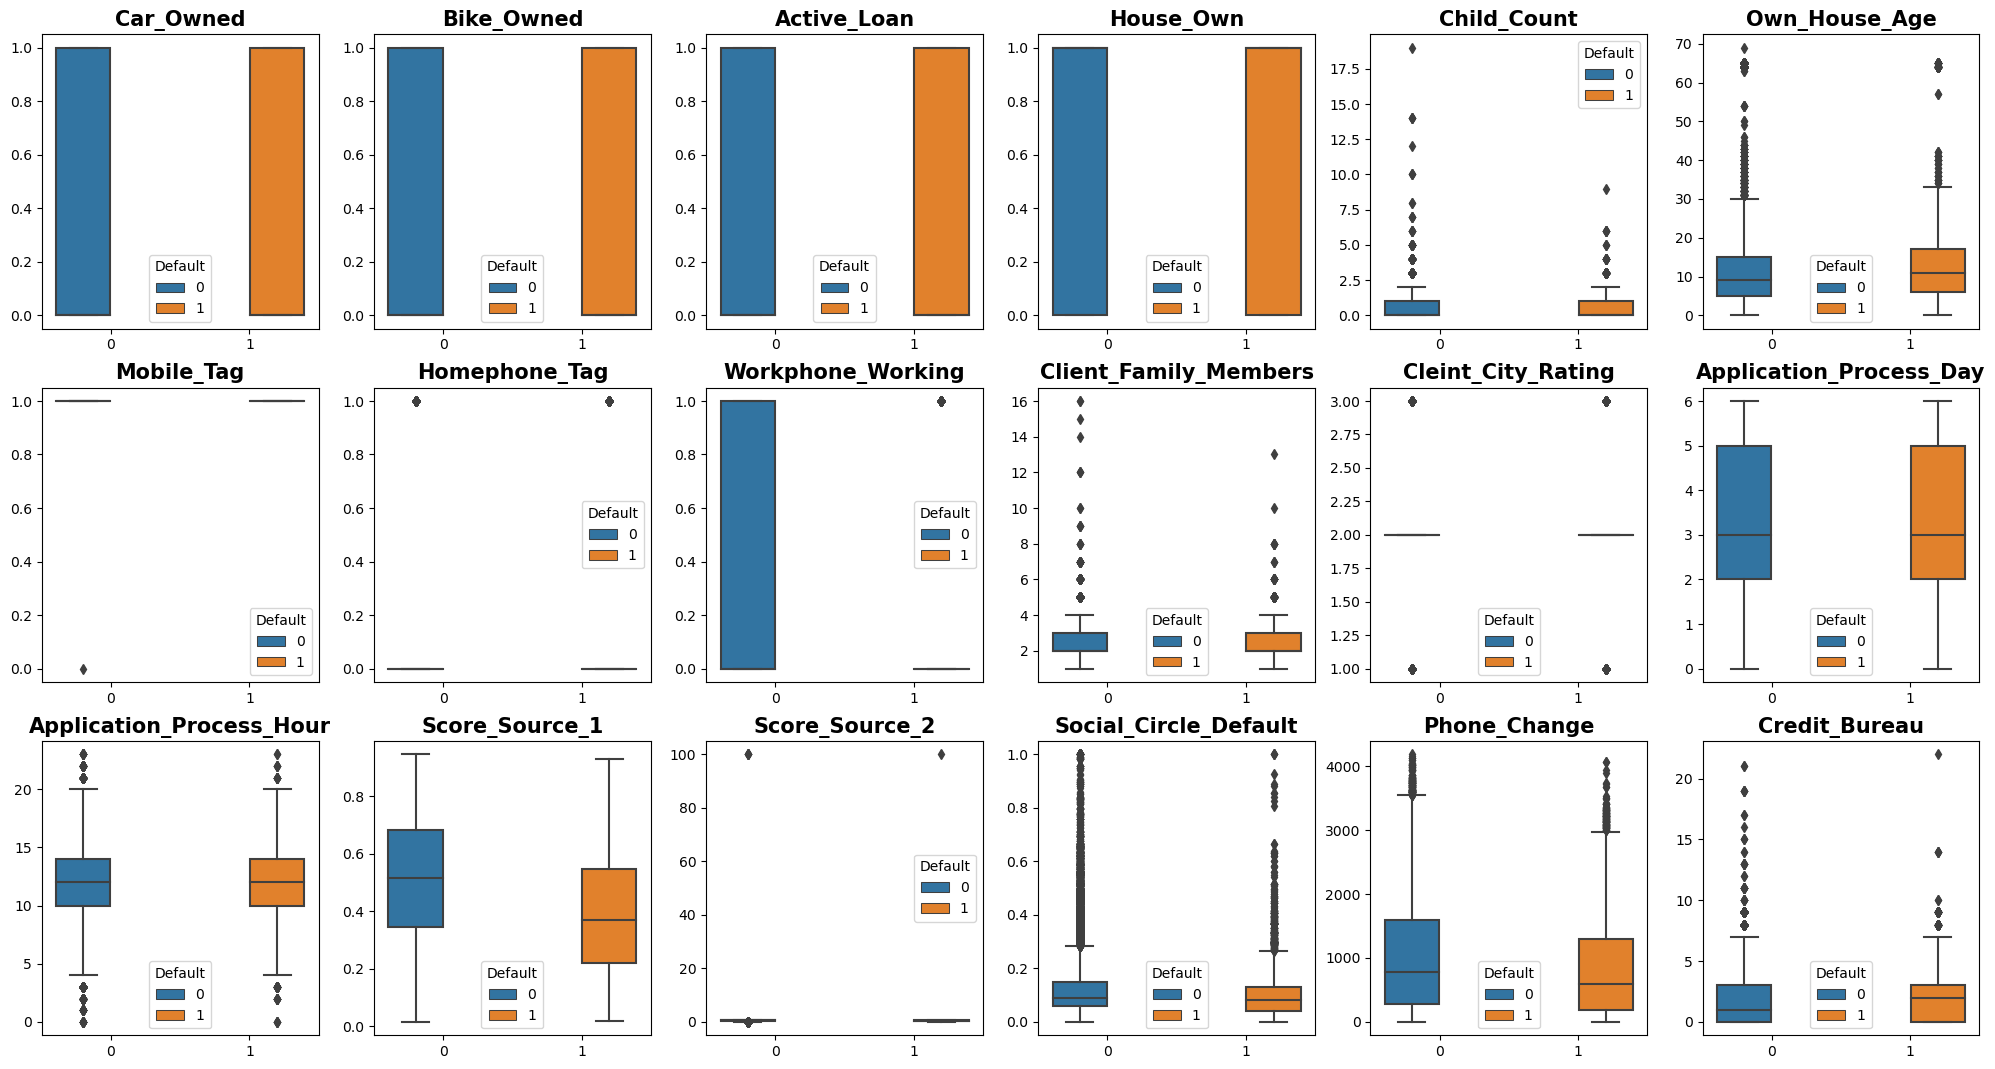

In [11]:
plt.figure(figsize=(20,10))
fig, axes2 = plt.subplots(nrows=3, ncols=6, figsize=(25,13))

for i, column in enumerate(numeric_columns):
    ax = axes2.flatten()[i] # get the flattened axes object
    ax.set_title(column ,fontweight="bold", fontsize=15)
    sns.boxplot(ax=ax, x='Default' ,y=column, data=loan_data, hue='Default')
    ax.set_xlabel("")  
    ax.set_ylabel("")

# There is no solid conclusion that can be drawn from this box plot about feature's relation with Default expect for the feature: where workphone is not reachable for default 1 users.

<AxesSubplot:>

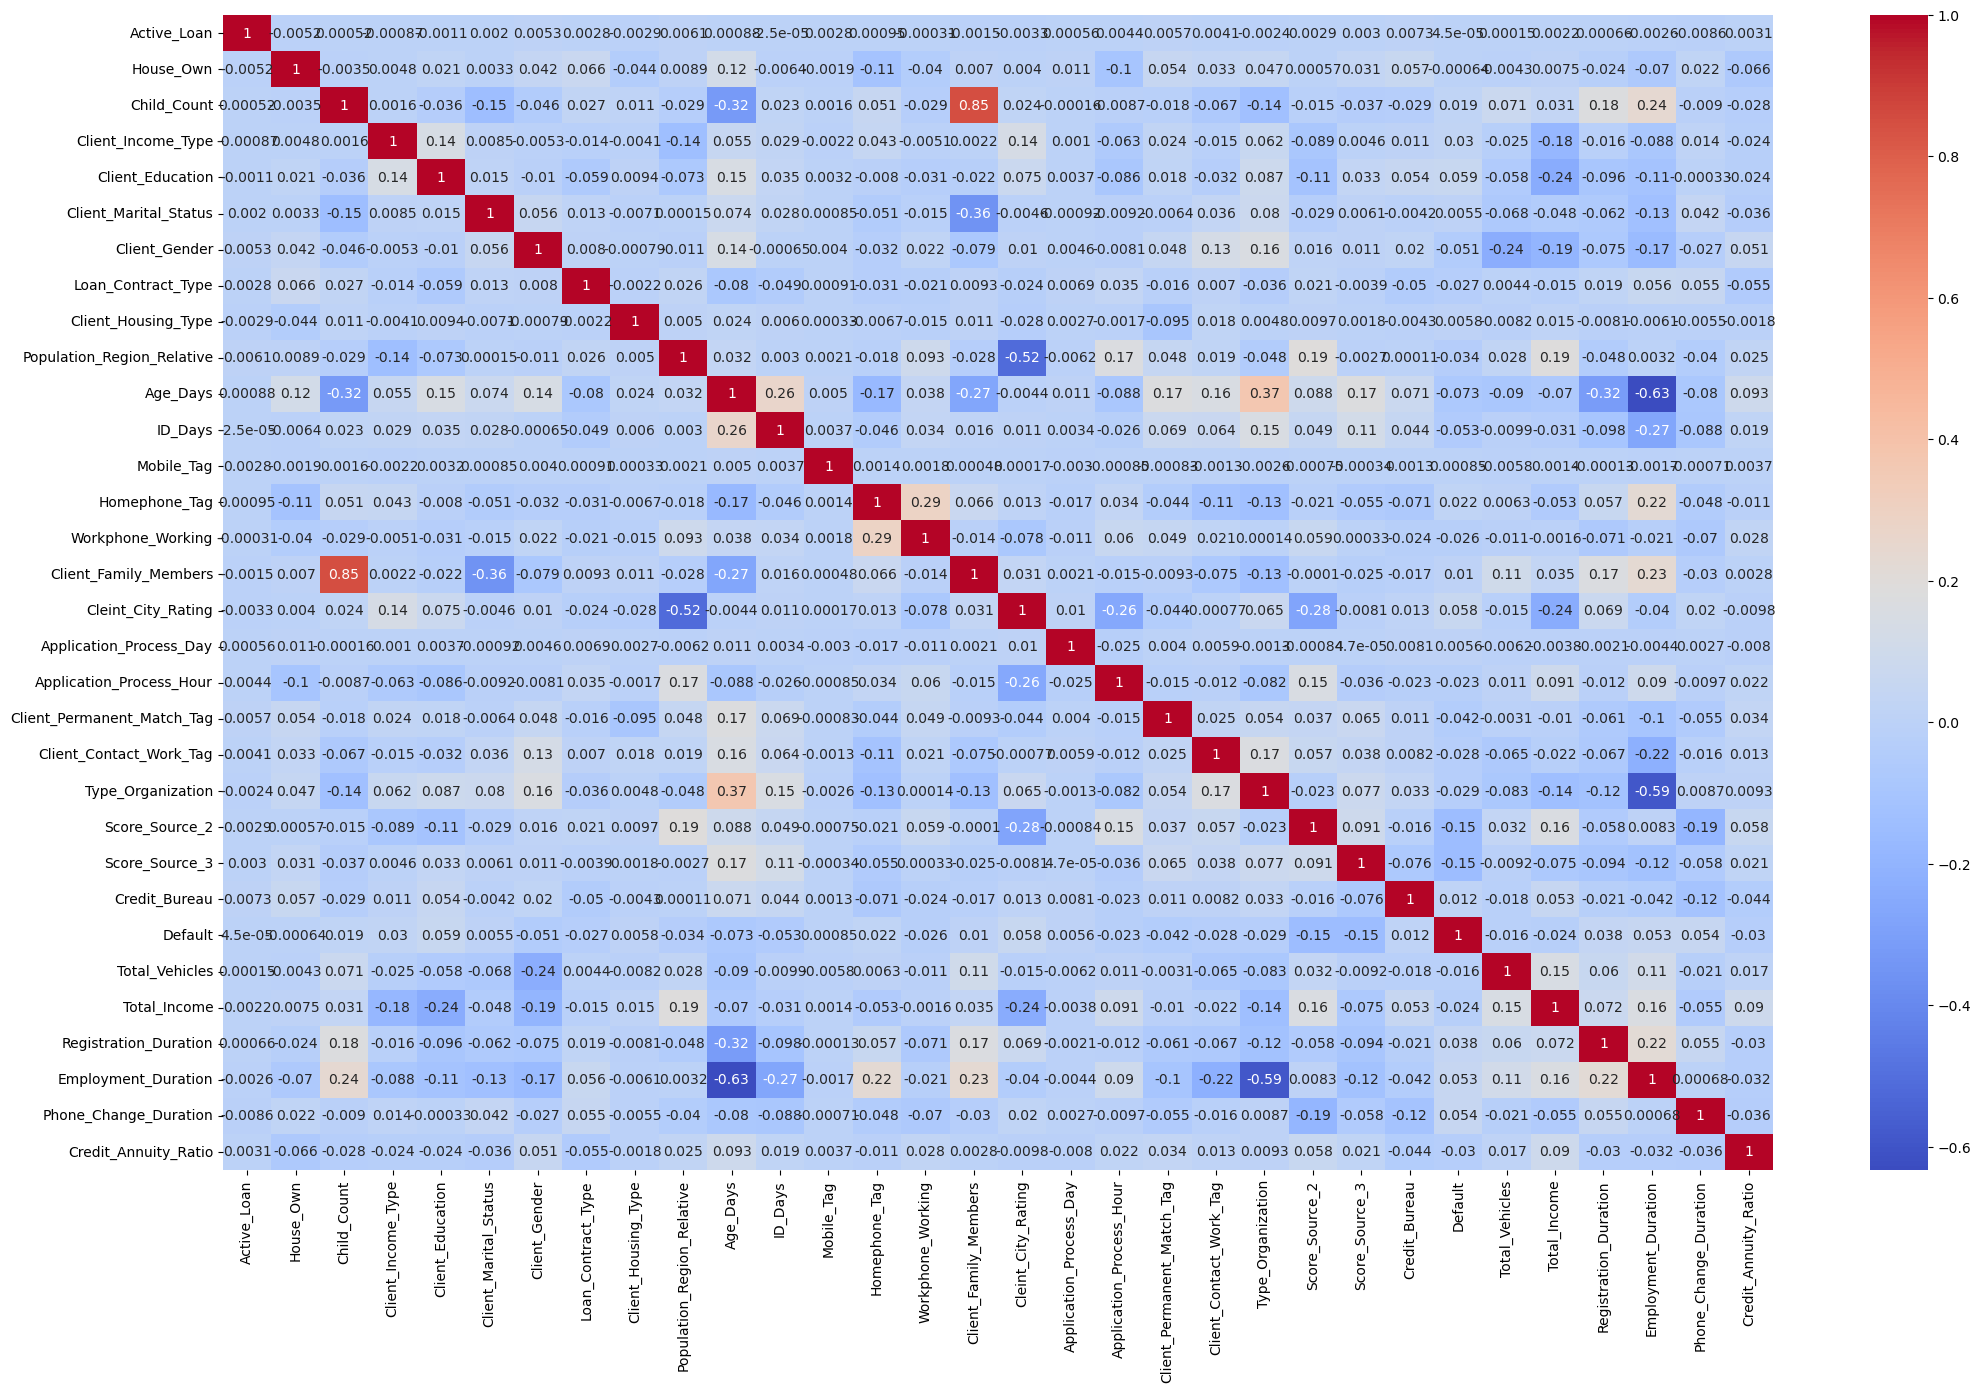

In [36]:
corr_matrix = loan_data.corr()

plt.figure(figsize=(25,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [12]:
## Handling Missing Data

round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)

ID                             0.00
Client_Income                  2.96
Car_Owned                      2.94
Bike_Owned                     2.97
Active_Loan                    2.98
House_Own                      3.00
Child_Count                    2.99
Credit_Amount                  2.98
Loan_Annuity                   3.95
Accompany_Client               1.43
Client_Income_Type             3.04
Client_Education               2.99
Client_Marital_Status          2.85
Client_Gender                  1.98
Loan_Contract_Type             3.00
Client_Housing_Type            3.03
Population_Region_Relative     3.99
Age_Days                       2.95
Employed_Days                  2.99
Registration_Days              2.97
ID_Days                        4.90
Own_House_Age                 65.73
Mobile_Tag                     0.00
Homephone_Tag                  0.00
Workphone_Working              0.00
Client_Occupation             34.00
Client_Family_Members          1.98
Cleint_City_Rating          

In [13]:
#Lets remove variables with more than ~25% of missing values

loan_data =  loan_data.drop(['Own_House_Age','Score_Source_1','Social_Circle_Default','Client_Occupation'],1)

### Mising value analysis and treatment

In [14]:
loan_data.select_dtypes(include=['float64','int64']).isnull().sum()

ID                              0
Car_Owned                    3581
Bike_Owned                   3624
Active_Loan                  3635
House_Own                    3661
Child_Count                  3638
Mobile_Tag                      0
Homephone_Tag                   0
Workphone_Working               0
Client_Family_Members        2410
Cleint_City_Rating           2409
Application_Process_Day      2428
Application_Process_Hour     3663
Score_Source_2               5686
Score_Source_3              26921
Phone_Change                 3664
Credit_Bureau               18539
Default                         0
dtype: int64

In [15]:
# Replacing Missing value with most repeated value within the column.

loan_data['Car_Owned'].fillna(loan_data.Car_Owned.mode()[0], inplace=True)
loan_data['Bike_Owned'].fillna(loan_data.Bike_Owned.mode()[0],inplace=True)
loan_data['Active_Loan'].fillna(loan_data.Active_Loan.mode()[0],inplace=True)
loan_data['House_Own'].fillna(loan_data.House_Own.mode()[0],inplace=True)
loan_data['Client_Income_Type'].fillna(loan_data.Client_Income_Type.mode()[0],inplace=True)
loan_data['Accompany_Client'].fillna(loan_data.Accompany_Client.mode()[0],inplace=True)
loan_data['Client_Education'].fillna(loan_data.Client_Education.mode()[0],inplace=True)
loan_data['Client_Marital_Status'].fillna(loan_data.Client_Marital_Status.mode()[0],inplace=True)
loan_data['Client_Gender'].fillna(loan_data.Client_Gender.mode()[0],inplace=True)
loan_data['Loan_Contract_Type'].fillna(loan_data.Loan_Contract_Type.mode()[0],inplace=True)
loan_data['Client_Housing_Type'].fillna(loan_data.Client_Housing_Type.mode()[0],inplace=True)
loan_data['Type_Organization'].fillna(loan_data.Type_Organization.mode()[0],inplace=True)
 

In [16]:
#Lets treat continuos variables and impute median as missing values.

income_median = (loan_data.Client_Income[(loan_data.Client_Income != '$') & (loan_data.Client_Income != '#')].astype(float)).median()

loan_data.loc[loan_data['Client_Income'] == '$', 'Client_Income'] = income_median
loan_data.loc[loan_data['Client_Income'] == '#', 'Client_Income'] = income_median
loan_data['Client_Income'].fillna(loan_data['Client_Income'].median(),inplace=True)

loan_data.Client_Income = loan_data.Client_Income.astype(float)
loan_data.Client_Income.isnull().sum()

0

In [17]:
#Child_Count
loan_data.Child_Count.fillna(loan_data.Child_Count.median(),inplace=True)


#Credit Amount
cr_amt_median = (loan_data.Credit_Amount[(loan_data.Credit_Amount != '$')].astype(float)).median()

loan_data.loc[loan_data.Credit_Amount == '$', 'Credit_Amount'] =cr_amt_median
loan_data.Credit_Amount.fillna(loan_data.Credit_Amount.median(),inplace=True)
loan_data.Credit_Amount = loan_data.Credit_Amount.astype(float)


#Loan Annuity
la_median = (loan_data.Loan_Annuity[(loan_data.Loan_Annuity !='$') & (loan_data.Loan_Annuity != '#VALUE!')].astype(float)).median()
loan_data.loc[loan_data.Loan_Annuity == '$','Loan_Annuity'] = la_median
loan_data.loc[loan_data.Loan_Annuity == '#VALUE!', 'Loan_Annuity'] = la_median

loan_data.Loan_Annuity.fillna(loan_data.Loan_Annuity.median(),inplace=True)
loan_data.Loan_Annuity = loan_data.Loan_Annuity.astype(float)

#Population Region Rel.
pop_median = (loan_data.Population_Region_Relative[(loan_data.Population_Region_Relative != '@') & (loan_data.Population_Region_Relative != '#')].astype(float)).median()

loan_data.loc[loan_data['Population_Region_Relative'] == '@', 'Population_Region_Relative'] = pop_median
loan_data.loc[loan_data['Population_Region_Relative'] == '#', 'Population_Region_Relative'] = pop_median
loan_data['Population_Region_Relative'].fillna(loan_data['Population_Region_Relative'].median(),inplace=True)

loan_data.Population_Region_Relative = loan_data.Population_Region_Relative.astype(float)


# Age Days
agedays_median = (loan_data.Age_Days[(loan_data.Age_Days != 'x')].astype(float)).median()

loan_data.loc[loan_data['Age_Days'] == 'x', 'Age_Days'] = agedays_median
loan_data['Age_Days'].fillna(loan_data['Age_Days'].median(),inplace=True)

loan_data.Age_Days = loan_data.Age_Days.astype(float)


#Employed Days
empdays_median = (loan_data.Employed_Days[(loan_data.Employed_Days != 'x')].astype(float)).median()

loan_data.loc[loan_data['Employed_Days'] == 'x', 'Employed_Days'] = empdays_median
loan_data['Employed_Days'].fillna(loan_data['Employed_Days'].median(),inplace=True)

loan_data.Employed_Days = loan_data.Employed_Days.astype(float)


#Registration Days
regdays_median = (loan_data.Registration_Days[(loan_data.Registration_Days != 'x')].astype(float)).median()

loan_data.loc[loan_data['Registration_Days'] == 'x', 'Registration_Days'] = regdays_median
loan_data['Registration_Days'].fillna(loan_data['Registration_Days'].median(),inplace=True)

loan_data.Registration_Days = loan_data.Registration_Days.astype(float)


#ID Days
iddays_median = (loan_data.ID_Days[(loan_data.ID_Days != 'x')].astype(float)).median()

loan_data.loc[loan_data['ID_Days'] == 'x', 'ID_Days'] = iddays_median
loan_data['ID_Days'].fillna(loan_data['ID_Days'].median(),inplace=True)

loan_data.ID_Days = loan_data.ID_Days.astype(float)


#source score
score_median = (loan_data.Score_Source_2[(loan_data.Score_Source_2 != '#')].astype(float)).median()

loan_data.loc[loan_data['Score_Source_2'] == '#', 'Score_Source_2'] = iddays_median
loan_data['Score_Source_2'].fillna(loan_data['Score_Source_2'].median(),inplace=True)

loan_data.Score_Source_2 = loan_data.Score_Source_2.astype(float)


#Other Vars

loan_data.Client_Family_Members.fillna(loan_data.Client_Family_Members.median(),inplace=True)
loan_data.Cleint_City_Rating.fillna(loan_data.Cleint_City_Rating.median(),inplace=True)
loan_data.Application_Process_Hour.fillna(loan_data.Application_Process_Hour.median(),inplace=True)
loan_data.Phone_Change.fillna(loan_data.Phone_Change.median(),inplace=True)
loan_data.Credit_Bureau.fillna(loan_data.Credit_Bureau.median(),inplace=True)
loan_data.Application_Process_Day.fillna(loan_data.Application_Process_Day.median(),inplace=True)
loan_data.Score_Source_3.fillna(loan_data.Score_Source_3.median(),inplace=True)

In [18]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121855 entries, 0 to 121854
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121855 non-null  int64  
 1   Client_Income               121855 non-null  float64
 2   Car_Owned                   121855 non-null  float64
 3   Bike_Owned                  121855 non-null  float64
 4   Active_Loan                 121855 non-null  float64
 5   House_Own                   121855 non-null  float64
 6   Child_Count                 121855 non-null  float64
 7   Credit_Amount               121855 non-null  float64
 8   Loan_Annuity                121855 non-null  float64
 9   Accompany_Client            121855 non-null  object 
 10  Client_Income_Type          121855 non-null  object 
 11  Client_Education            121855 non-null  object 
 12  Client_Marital_Status       121855 non-null  object 
 13  Client_Gender 

### Outlier Treatment

In [19]:
loan_data.select_dtypes(include=['float64','int64']).iloc[:,:25].describe(percentiles=[.01,.05,.1,.25,.5,.75,.82,.83,.85,.9,.95,.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,82%,83%,85%,90%,95%,99%,max
ID,121855.0,1.216093e+07,35176.723805,1.210000e+07,1.210122e+07,1.210609e+07,1.211219e+07,1.213047e+07,1.216093e+07,1.219139e+07,1.219992e+07,1.220114e+07,1.220358e+07,1.220967e+07,1.221576e+07,1.222064e+07,1.222186e+07
Client_Income,121855.0,1.679196e+04,11373.125310,2.565000e+03,4.500000e+03,6.750000e+03,8.100000e+03,1.125000e+04,1.440000e+04,2.025000e+04,2.250000e+04,2.250000e+04,2.250000e+04,2.700000e+04,3.330000e+04,4.725000e+04,1.800009e+06
Car_Owned,121855.0,3.327808e-01,0.471211,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Bike_Owned,121855.0,3.223750e-01,0.467388,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Active_Loan,121855.0,4.842805e-01,0.499755,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
House_Own,121855.0,7.013089e-01,0.457686,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Child_Count,121855.0,4.053096e-01,0.721355,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.900000e+01
Credit_Amount,121855.0,5.979914e+04,39769.047904,4.500000e+03,7.819200e+03,1.422000e+04,1.800000e+04,2.745000e+04,5.175000e+04,8.086500e+04,9.270000e+04,9.542070e+04,1.016496e+05,1.129500e+05,1.350000e+05,1.842100e+05,4.050000e+05
Loan_Annuity,121855.0,2.712489e+03,1432.888558,2.173500e+02,6.327000e+02,9.000000e+02,1.125000e+03,1.687500e+03,2.499750e+03,3.408075e+03,3.825000e+03,3.893850e+03,4.048155e+03,4.558770e+03,5.324850e+03,6.961428e+03,2.250000e+04
Population_Region_Relative,121855.0,2.245255e-02,0.405273,5.330000e-04,2.134000e-03,5.002000e-03,6.671000e-03,1.003200e-02,1.885000e-02,2.639200e-02,3.075500e-02,3.132900e-02,3.132900e-02,3.579200e-02,4.622000e-02,7.250800e-02,1.000000e+02


In [20]:
# Replacing outlier with 99th percentile value

loan_data.loc[loan_data.Client_Income > 47250, 'Client_Income'] = 47250
loan_data.loc[loan_data.Child_Count > 3,'Child_Count'] = 3
loan_data.loc[loan_data.Credit_Amount > 184209, 'Credit_Amount'] = 184209
loan_data.loc[loan_data.Loan_Annuity > 6961.43, 'Loan_Annuity'] = 6961.43
loan_data.loc[loan_data.Population_Region_Relative >= 0.072508, 'Population_Region_Relative'] = 0.072508
loan_data.loc[loan_data.Registration_Days > 13817.000000, 'Registration_Days'] = 13817.000000
loan_data.loc[loan_data.Client_Family_Members > 5, 'Client_Family_Members'] = 5
loan_data.loc[loan_data.Score_Source_2 > 0.7823646, 'Score_Source_2'] = 0.7823646
loan_data.loc[loan_data.Credit_Bureau > 8, 'Credit_Bureau'] = 8
loan_data.loc[loan_data.ID_Days > 5434,'ID_Days'] = 5434
loan_data.loc[loan_data.Application_Process_Hour > 19,'Application_Process_Hour'] = 19
loan_data.loc[loan_data.Employed_Days > 36524, 'Employed_Days'] = 36524
loan_data.loc[loan_data.Registration_Days > 13817, 'Registration_Days'] = 13817



loan_data.select_dtypes(include=['float64','int64']).iloc[:,13:].describe(percentiles=[.01,.05,.1,.25,.5,.75,.82,.83,.85,.9,.95,.99])


,ID_Days,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
count,121855.000000,121855.000000,121855.000000,121855.000000,121855.000000,121855.000000,121855.000000,121855.000000,121855.000000,121855.000000,121855.000000,121855.000000,121855.000000
mean,2997.205129,0.999992,0.200501,0.281203,2.148365,2.029445,3.156555,12.052300,0.515799,0.516899,955.886578,1.749842,0.080785
std,1470.304647,0.002865,0.400377,0.449588,0.889318,0.499416,1.741582,3.209384,0.187462,0.171864,816.199139,1.717734,0.272505
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000005,0.000527,0.000000,0.000000,0.000000
1%,65.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000,0.031547,0.074461,0.000000,0.000000,0.000000
5%,385.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,7.000000,0.137051,0.178760,0.000000,0.000000,0.000000
10%,753.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.000000,0.221897,0.260856,0.000000,0.000000,0.000000
25%,1789.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.402002,0.424130,287.000000,1.000000,0.000000
50%,3242.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.564978,0.537070,755.000000,1.000000,0.000000
75%,4263.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.659828,0.631355,1550.000000,3.000000,0.000000


In [21]:
loan_data.select_dtypes(include=['object']).columns


Index(['Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization'],
      dtype='object')

In [22]:
cat_cols = ['Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization']

In [23]:
for col in cat_cols:
    print(f"Value counts for {col}:")
    print(loan_data[col].value_counts())
    print('\n\n')


Value counts for Accompany_Client:
Alone       99154
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
##             12
Name: Accompany_Client, dtype: int64



Value counts for Client_Income_Type:
Service            64728
Commercial         27764
Retired            21043
Govt Job            8303
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: Client_Income_Type, dtype: int64



Value counts for Client_Education:
Secondary             87555
Graduation            28819
Graduation dropout     3960
Junior secondary       1455
Post Grad                66
Name: Client_Education, dtype: int64



Value counts for Client_Marital_Status:
M    90821
S    17404
D     7556
W     6074
Name: Client_Marital_Status, dtype: int64



Value counts for Client_Gender:
Male      80876
Female    40976
XNA           3
Name: Client_Gender, dtype: int64



Value counts for Loan_Contract_Type:
CL    110768
RL     11

In [24]:
## Replacing 12 ## with 'Unaccompanied' for feature: 'Accompany_Client'

loan_data.loc[loan_data.Accompany_Client == '##', 'Accompany_Client'] = 'Unaccompanied'

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    loan_data[col] = le.fit_transform(loan_data[col])


In [26]:
loan_data.drop('ID', axis=1, inplace=True)


In [27]:
loan_data.head(5)

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,0,1,...,6.0,17.0,1,1,42,0.478787,0.537070,63.0,1.0,0
1,20250.0,1.0,0.0,1.0,1.0,0.0,15282.00,1826.55,0,5,...,3.0,10.0,1,1,11,0.215068,0.537070,755.0,1.0,0
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,0,5,...,4.0,12.0,1,1,42,0.552795,0.329655,277.0,0.0,0
3,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,0,4,...,2.0,15.0,1,1,57,0.135182,0.631355,1700.0,3.0,0
4,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,0,1,...,3.0,12.0,1,1,5,0.301182,0.355639,674.0,1.0,0


In [28]:
loan_data.columns

Index(['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Mobile_Tag', 'Homephone_Tag',
       'Workphone_Working', 'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_2', 'Score_Source_3', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

### Feature Engineering

In [29]:
# new feature: Total number of vehicles owned by client
loan_data['Total_Vehicles'] = loan_data['Car_Owned'] + loan_data['Bike_Owned']

# new feature: Total income
loan_data['Total_Income'] = loan_data['Client_Income'] + loan_data['Accompany_Client']

# new feature: Number of days since registration
loan_data['Registration_Duration'] = -loan_data['Registration_Days']

# new feature: Number of days employed
loan_data['Employment_Duration'] = -loan_data['Employed_Days']

# new feature: Number of days since mobile phone change
loan_data['Phone_Change_Duration'] = -loan_data['Phone_Change']

# new feature: Ratio of credit amount to loan annuity
loan_data['Credit_Annuity_Ratio'] = loan_data['Credit_Amount'] / loan_data['Loan_Annuity']

# Drop original columns that were used to create new features
loan_data.drop(['Car_Owned', 'Bike_Owned', 'Client_Income', 'Accompany_Client',
                'Registration_Days', 'Employed_Days', 'Phone_Change',
                'Credit_Amount', 'Loan_Annuity'], axis=1, inplace=True)

loan_data.head()

,Active_Loan,House_Own,Child_Count,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,...,Score_Source_2,Score_Source_3,Credit_Bureau,Default,Total_Vehicles,Total_Income,Registration_Duration,Employment_Duration,Phone_Change_Duration,Credit_Annuity_Ratio
0,1.0,0.0,0.0,1,4,1,1,0,1,0.028663,...,0.478787,0.537070,1.0,0,0.0,6750.0,-6123.0,-1062.0,-63.0,17.908468
1,1.0,1.0,0.0,5,0,1,1,0,1,0.008575,...,0.215068,0.537070,1.0,0,1.0,20250.0,-7833.0,-4129.0,-755.0,8.366593
2,1.0,0.0,1.0,5,1,3,1,0,0,0.022800,...,0.552795,0.329655,0.0,0,0.0,18000.0,-4493.0,-5102.0,-277.0,21.349742
3,1.0,1.0,0.0,4,4,1,1,0,1,0.010556,...,0.135182,0.631355,3.0,0,0.0,15750.0,-4493.0,-36524.0,-1700.0,23.468340
4,1.0,0.0,2.0,1,4,1,0,0,1,0.020713,...,0.301182,0.355639,1.0,0,1.0,33750.0,-5516.0,-2977.0,-674.0,37.771407


In [30]:
loan_data.columns

Index(['Active_Loan', 'House_Own', 'Child_Count', 'Client_Income_Type',
       'Client_Education', 'Client_Marital_Status', 'Client_Gender',
       'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'ID_Days', 'Mobile_Tag',
       'Homephone_Tag', 'Workphone_Working', 'Client_Family_Members',
       'Cleint_City_Rating', 'Application_Process_Day',
       'Application_Process_Hour', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization', 'Score_Source_2',
       'Score_Source_3', 'Credit_Bureau', 'Default', 'Total_Vehicles',
       'Total_Income', 'Registration_Duration', 'Employment_Duration',
       'Phone_Change_Duration', 'Credit_Annuity_Ratio'],
      dtype='object')

In [31]:
loan_data

,Active_Loan,House_Own,Child_Count,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,...,Score_Source_2,Score_Source_3,Credit_Bureau,Default,Total_Vehicles,Total_Income,Registration_Duration,Employment_Duration,Phone_Change_Duration,Credit_Annuity_Ratio
0,1.0,0.0,0.0,1,4,1,1,0,1,0.028663,...,0.478787,0.537070,1.0,0,0.0,6750.0,-6123.0,-1062.0,-63.0,17.908468
1,1.0,1.0,0.0,5,0,1,1,0,1,0.008575,...,0.215068,0.537070,1.0,0,1.0,20250.0,-7833.0,-4129.0,-755.0,8.366593
2,1.0,0.0,1.0,5,1,3,1,0,0,0.022800,...,0.552795,0.329655,0.0,0,0.0,18000.0,-4493.0,-5102.0,-277.0,21.349742
3,1.0,1.0,0.0,4,4,1,1,0,1,0.010556,...,0.135182,0.631355,3.0,0,0.0,15750.0,-4493.0,-36524.0,-1700.0,23.468340
4,1.0,0.0,2.0,1,4,1,0,0,1,0.020713,...,0.301182,0.355639,1.0,0,1.0,33750.0,-5516.0,-2977.0,-674.0,37.771407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121850,0.0,1.0,0.0,5,4,1,0,0,1,0.031329,...,0.173527,0.184116,1.0,1,0.0,29255.0,-2661.0,-2863.0,-0.0,34.063122
121851,1.0,0.0,0.0,1,0,1,0,0,1,0.018209,...,0.371559,0.406617,0.0,0,1.0,15750.0,-902.0,-636.0,-4.0,30.771683
121852,0.0,1.0,1.0,2,4,1,1,0,1,0.008068,...,0.048079,0.537070,1.0,0,1.0,8100.0,-3980.0,-1623.0,-0.0,18.434743
121853,0.0,1.0,0.0,5,0,1,0,0,1,0.028663,...,0.103538,0.077499,2.0,0,2.0,38250.0,-895.0,-847.0,-0.0,16.548072


In [32]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Create X and y
X = loan_data.drop('Default', axis=1)
y = loan_data['Default']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [33]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.linear_model import LogisticRegression



# Define pipeline with PCA, normalization, and logistic regression
pipeline = imbPipeline([
    ('pca', PCA()),
    ('scaler', MinMaxScaler()),
    ('sampler', RandomOverSampler()),
    ('lr', LogisticRegression())
])

# Define parameters for grid search
param_grid = {
    'pca__n_components': [5, 10, 15, 20, 25,30],
    'lr__C': [0.1, 1, 10],
    'lr__penalty': ['l1', 'l2']
}

# Perform grid search to find optimal n_components
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_n_components = grid_search.best_params_['pca__n_components']
C=grid_search.best_params_['lr__C']
penalty=grid_search.best_params_['lr__penalty']


## PCA doesn't seems to be helpful as the best param value is found to be 30 which mean it is suggest us to use all the features.

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [34]:
# Perform PCA with optimal n_components
pca = PCA(n_components=best_n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Perform data normalization
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train_pca)
X_test_norm = scaler.transform(X_test_pca)

# Perform data balancing
sampler = RandomOverSampler()
X_train_bal, y_train_bal = sampler.fit_resample(X_train_norm, y_train)

# Fit logistic regression model on balanced data
lr = LogisticRegression(C=1, penalty='l2')
lr.fit(X_train_bal, y_train_bal)

# Evaluate model on test data
score = lr.score(X_test_norm, y_test)
print("Accuracy on test data: {:.2f}%".format(score*100))


Accuracy on test data: 67.43%
